## Ml Project - 1

Here we are provided with the insurance cost data and we need to build model which predicts cost of insurance using ml methods.

## Workflow

1. Data collection
2. Data analysis
3. Data processing
4. Test train split
5. Linear regression model
6. Trained linear regression model

In [1]:
## Export all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
## Data collection and processing

In [3]:
insurance_df = pd.read_csv("insurance.csv")##loading a data from csv to a pandas dataframe

In [4]:
insurance_df.head() ##load top 5 rows of dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#number of rows and columns
insurance_df.shape

(1338, 7)

In [6]:
##getting some information about the dataset
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Here we have 3 categorical features : 
(sex , somker , region)


In [7]:
## checking for missing values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
## Data Analysis

In [9]:
## statistical measure of dataset
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


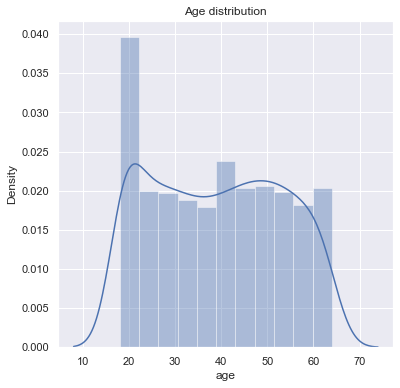

In [10]:
##distribution of age value
sns.set()
plt.figure(figsize= (6, 6))
sns.distplot(insurance_df["age"])
plt.title("Age distribution")
plt.show()


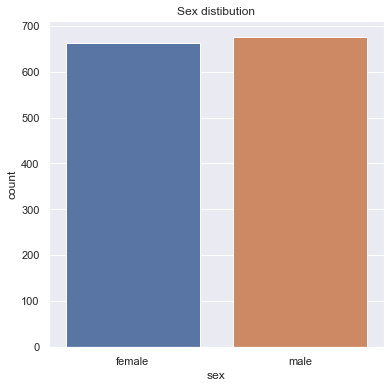

In [11]:
##distribution of gender
plt.figure(figsize = (6,6))
sns.countplot(x = "sex" ,data = insurance_df)
plt.title("Sex distibution")
plt.show()

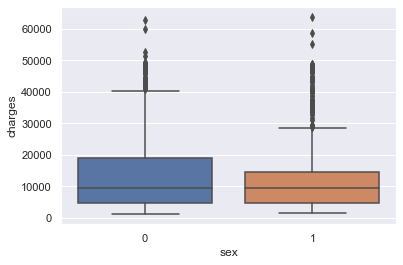

In [55]:
#Box Plot for Gender vs  charges
sns.boxplot(x=insurance_df.sex, y=insurance_df.charges)
plt.show()

In [12]:
insurance_df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


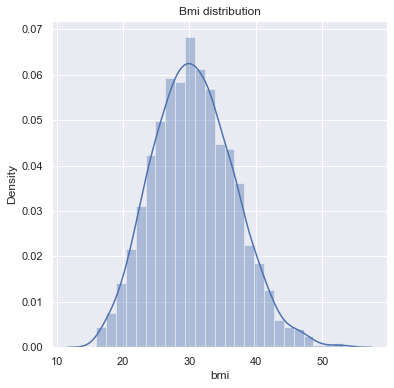

In [13]:
plt.figure(figsize= (6, 6))
sns.distplot(insurance_df["bmi"])
plt.title("Bmi distribution")
plt.show()


Normal Bmi Range ---> 18.5 - 24.9

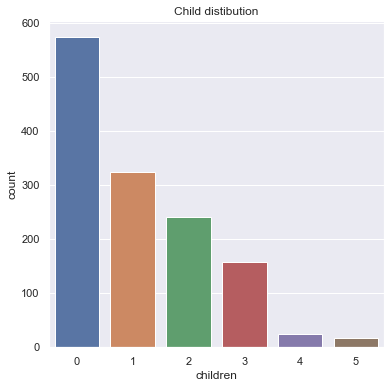

In [14]:
plt.figure(figsize = (6,6))
sns.countplot(x = "children" ,data = insurance_df)
plt.title("Child distibution")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


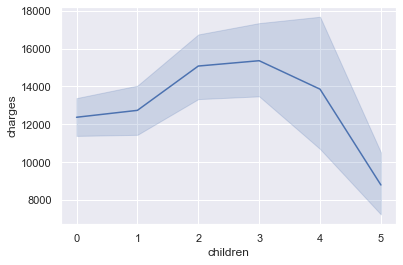

In [56]:
sns.lineplot(insurance_df.children, insurance_df.charges)
plt.show()

In [15]:
insurance_df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

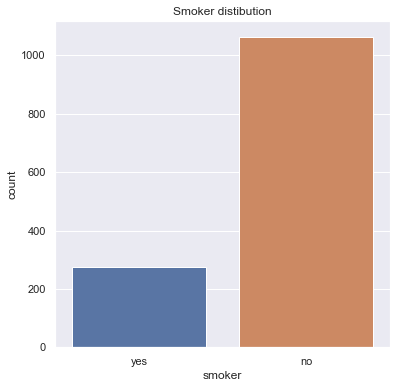

In [16]:
plt.figure(figsize = (6,6))
sns.countplot(x = "smoker" ,data = insurance_df)
plt.title("Smoker distibution")
plt.show()

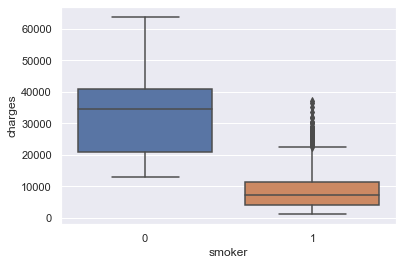

In [57]:
sns.boxplot(x=insurance_df.smoker, y=insurance_df.charges)
plt.show()

In [17]:
insurance_df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

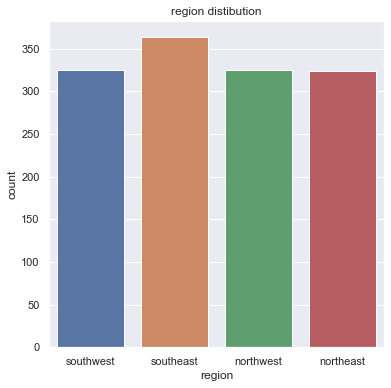

In [18]:
plt.figure(figsize = (6,6))
sns.countplot(x = "region" ,data = insurance_df)
plt.title("region distibution")
plt.show()

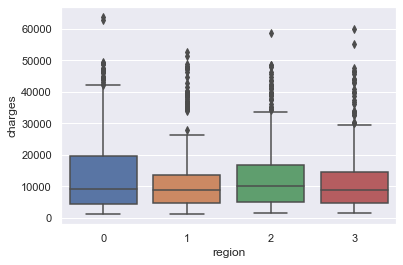

In [58]:
sns.boxplot(x=insurance_df.region, y=insurance_df.charges)
plt.show()

In [19]:
insurance_df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


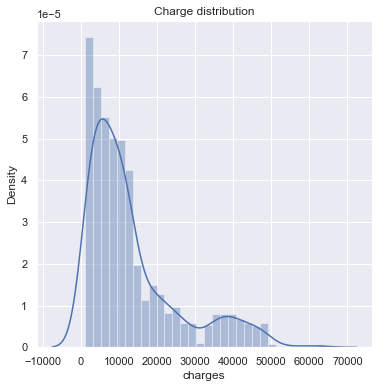

In [20]:
plt.figure(figsize= (6, 6))
sns.distplot(insurance_df["charges"])
plt.title("Charge distribution")
plt.show()

In [51]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

#### Observations based on the above plots:
1.Males and females are almost equal in number and on average median charges of males and females are also the same, but males have a higher range of charges.

2.Insurance charges are relatively higher for smokers.

3.Charges are highest for people with 2–3 children

4.Customers are almost equally distributed across the 4 regions and all of them have almost the same charges.

5.ercentage of female smokers is less than the percentage of male smokers.

In [21]:
## Data preprocessing

Here we have 3 categorical varibles in dataset, Computer don't understand the text values so we are going to create label (numerical) 

In [22]:
##encoding categorical features

In [23]:

## encoding sex columns

In [24]:
insurance_df.replace({'sex':{'male':0,'female':1}},inplace = True)

In [25]:
## encoding smoker column

In [26]:
insurance_df.replace({'smoker':{'yes':0,"no":1}},inplace = True)

In [27]:
##encoding region column
insurance_df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [28]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [29]:
## Spliting the features and target

In [30]:
X =  insurance_df.drop(columns = "charges",axis = 1)
Y =  insurance_df["charges"]

In [31]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [32]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [33]:
##Splititing dataset into Training data & Testing data

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [35]:

print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [36]:
## Model training

In [37]:
##linear regression

In [38]:
##loading the linear regression model
regressor = LinearRegression()

In [39]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [40]:
## Model evaluation

In [41]:
##prediction on training data
training_data_prediction = regressor.predict(X_train)

In [42]:
## r-squared values
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print("R squared value:",r2_train)

R squared value: 0.751505643411174


In [43]:
## a prediction on test_data

In [44]:
test_data_prediction = regressor.predict(X_test)

In [45]:
## r-squared values
r2_train = metrics.r2_score(Y_test,test_data_prediction)
print("R squared value:",r2_train)

R squared value: 0.7447273869684077


In [46]:
##Buliding predictive system

In [47]:
input_data = (36,0,35.2,1,0,0)

# changing inputdata to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

##reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

In [48]:
print("The insurance cost in Usd", prediction[0])

The insurance cost in Usd 32627.27979524235
